# Elections Ad Spending Analysis in Argentina using Python(2023)

#### We collected data from Google ads about how much money was spent in formats like text, videos or image by political parties during Argentina elections 2023. In this article, we perform elections ad spending analysis - EDA - using Python (and how it impacted the voting patterns).

## Data Collection

We extract the dataset from Ads Transparency Center which format is in Google Sheet. We transform this and download it in a .csv format. 

We import the library pandas for dataframe manipulation.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df_ads = pd.read_csv("/home/andy/Descargas/ds_googleads.csv") #cambiar esto, quiero que me aparezca
                                                                #sólo el nombre de la carpeta
print("Shape of dataset: ", df_ads.shape)


In [ ]:
# Let's see the column names
df_ads.keys()

In [ ]:
# Let's check it out, for example, the first URL 
df_ads['Ad_URL'][0]

In [ ]:
len(df_ads['Advertiser_ID'].unique())

In [ ]:
fr = 'AR14823408713892626433'
df_ads[df_ads['Advertiser_ID'] == fr]

In [ ]:
gc = 'AR17825122736721100801'
df_ads[df_ads['Advertiser_ID'] == gc]

In [ ]:
df_ads.drop(['Ad_ID'],axis=1)

In [ ]:
#show the first 5 rows
df_ads.head()

#levantar datos datetime,
#pd.to_datetime()

### Data Cleaning & Data Preprocessing

In [ ]:
#Let's drop NaN values from the dataframe like 
#Ad_Campaigns_List, Age_Trageting, Gender_Targeting,  Geo_Targeting_Excluded.

display(type(df_ads))  # This should print <class 'pandas.core.frame.DataFrame'>
display(df_ads.head())  # Print the first few rows to ensure it's a valid DataFrame

In [ ]:
# Let's see summary statistics of relevant columns, for example: Spend_Range_Max_ARS:
print(df_ads['Spend_Range_Max_ARS'])

In [ ]:
# We convert the data type:'Spend_Range_Max_ARS'  to float
df_ads['Spend_Range_Max_ARS'] = df_ads['Spend_Range_Max_ARS'].astype(float)

# Display the updated data types
print(df_ads.dtypes)


Given that the inner elements from column 'Spend_Range_Max_AR' has a typing error(?), we fix it in the following way: 

In [ ]:
# Remove the thousand separator and replace the decimal separator
df_ads['Spend_Range_Max_ARS'] = df_ads['Spend_Range_Max_ARS'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)

# Convert the column to float
df_ads['Spend_Range_Max_ARS'] = df_ads['Spend_Range_Max_ARS'].astype(float)

# Display the updated DataFrame and data types
display(df_ads)
display(df_ads.dtypes)


In [ ]:
# 
display(df_ads['Spend_Range_Max_ARS'].describe())

In [ ]:
df_ads['Spend_Range_Max_ARS'].hist(bins=100)

plt.xlim(0, 100000)

In [ ]:
#We calculate the mode (most frequent value) of the column 'Spend_Range_Max_ARS':
df_ads['Spend_Range_Max_ARS'].value_counts()

### Ad Spend Analysis

In [ ]:
# Get unique ID types
unique_ids = df_ads['Ad_ID'].unique()
display("Unique Ad ID:", unique_ids)

In [ ]:
# Initialize an empty list to compile unique ID types
compiled_unique_ids = []

# Loop through unique IDs
for ad_id in unique_ids:
    # Append each unique ID to the list
    compiled_unique_ids.append(ad_id)
    # display the ID type
    display(f"Compiled Ad ID: {ad_id}")
    

In [ ]:
# We don the same for the column 'Spend_Range_Max_ARS'
most_spend = df_ads['Spend_Range_Max_ARS']
display("Most spend:", most_spend)

In [ ]:
# Initialize an empty list to compile the values of 'Spend_Range_Max_ARS'
compiled_most_spend= []

# Loop through unique IDs
for spend_id in most_spend:
# Append each value to the list
    compiled_most_spend.append(spend_id)
# display the list
    display(f"Compiled : {spend_id}")
    

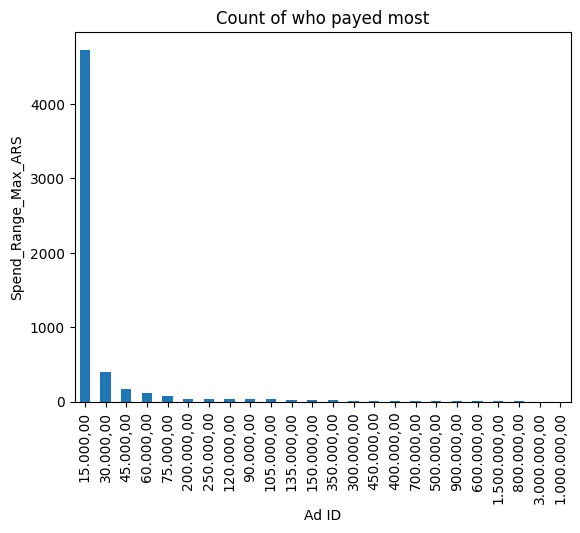

In [19]:
# Get counts of each ID type
id_counts = df_ads['Spend_Range_Max_ARS'].value_counts()

# Create a bar plot
id_counts.plot(kind='bar')

# Add titles and labels
plt.title('Count of who payed most')
plt.xlabel('Ad ID')
plt.ylabel('Spend_Range_Max_ARS')

# Show the plot
plt.show()
